<a href="https://colab.research.google.com/github/Chandramani05/NBA-Games-Data-Analysis-and-Match-Prediction/blob/main/NBA_Machine_learning_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import torch
torch.cuda.is_available()

False

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt

In [5]:
def npv_score(y_test, y_pred):
    true_negatives = np.unique(np.array(list(zip(y_test.values, y_pred))).sum(axis=1), return_counts=True)[1][0]
    predicted_negatives = np.unique(y_pred, return_counts=True)[1][0]
    npv = true_negatives / predicted_negatives
    return npv

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning NBA /NBA-Games-Data-Analysis-and-Match-Prediction/Final Data/games_with_features.csv", index_col="id")

In [7]:
lr = LogisticRegression(max_iter=1000)
nb = GaussianNB()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier(eval_metric="logloss", use_label_encoder=False)

models = [lr, nb, knn, rf, xgb]

In [8]:
def train_model(model, train_data, test_data):
    X_train = train_data.drop("winner", axis=1)
    y_train = train_data["winner"]
    X_test = test_data.drop("winner", axis=1)
    y_test = test_data["winner"]                     

    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    #print(cross_val_score(model, feats, target).mean())

In [9]:
train_data = df[df["season"].isin([2017])][["home_team_avg_score", "visitor_team_avg_score", "winner"]]
test_data = df[df["season"].isin([2018])][["home_team_avg_score", "visitor_team_avg_score", "winner"]]
for model in models:
    train_model(model, train_data, test_data)

0.6399694889397407
0.6414950419527079
0.5537757437070938
0.532418001525553
0.6018306636155606


xgboost and random forest predict around 80% correctly when using data from the same season.
unfortunately when trying to predict results of future seasons the result is horrible.

##Using Stats Data

In [10]:
stats = pd.read_csv("/content/drive/MyDrive/Machine Learning NBA /NBA-Games-Data-Analysis-and-Match-Prediction/Final Data/stats_feats.csv",index_col="game.id")
stats

,game.date,game.season,winner,home_ast,home_blk,home_dreb,home_fg3_pct,home_fg3a,home_fg3m,home_fg_pct,...,diff_away_fgm,diff_away_ft_pct,diff_away_fta,diff_away_ftm,diff_away_oreb,diff_away_pf,diff_away_pts,diff_away_reb,diff_away_stl,diff_away_turnover
game.id,,,,,,,,,,,,,,,,,,,,,
1,2018-10-16,2018,1,23.40,5.35,36.05,0.283508,32.10,11.60,0.407498,...,-1.10,-0.084629,-2.80,-1.85,-2.30,-0.95,-3.30,-0.45,-0.95,-2.65
2,2018-10-16,2018,1,31.55,7.60,34.45,0.186014,27.60,11.35,0.511330,...,2.00,0.031878,-2.45,0.15,-3.90,-1.20,4.30,-2.25,-0.15,3.15
3,2018-10-17,2018,0,21.35,5.15,35.85,0.211261,26.70,9.45,0.415333,...,0.90,0.082519,3.55,2.55,0.25,-4.50,5.20,4.10,-2.35,-2.95
4,2018-10-17,2018,1,23.15,3.40,33.55,0.239457,28.45,11.50,0.431416,...,1.50,-0.106143,-5.10,-4.75,0.15,-2.80,-0.50,-1.75,0.60,-3.30
5,2018-10-17,2018,1,22.55,4.25,33.20,0.291932,25.80,10.00,0.453450,...,5.40,0.003677,-0.10,-1.25,-0.20,-5.05,10.15,3.00,1.15,-1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857658,2022-11-28,2022,0,25.85,4.40,32.05,20.284341,33.80,12.50,32.655897,...,-2.90,0.107326,6.50,4.85,-2.55,-3.30,1.05,-2.90,-0.80,0.60
857659,2022-11-28,2022,0,24.95,4.80,34.45,13.977462,39.25,14.65,28.952156,...,0.20,-10.664621,7.10,4.05,2.30,1.70,7.35,3.10,0.35,1.40
857660,2022-11-28,2022,0,22.90,6.00,33.20,24.626431,33.05,10.85,42.398149,...,1.50,2.393646,-1.20,-1.55,-1.85,-0.80,0.15,-2.45,1.05,-1.80


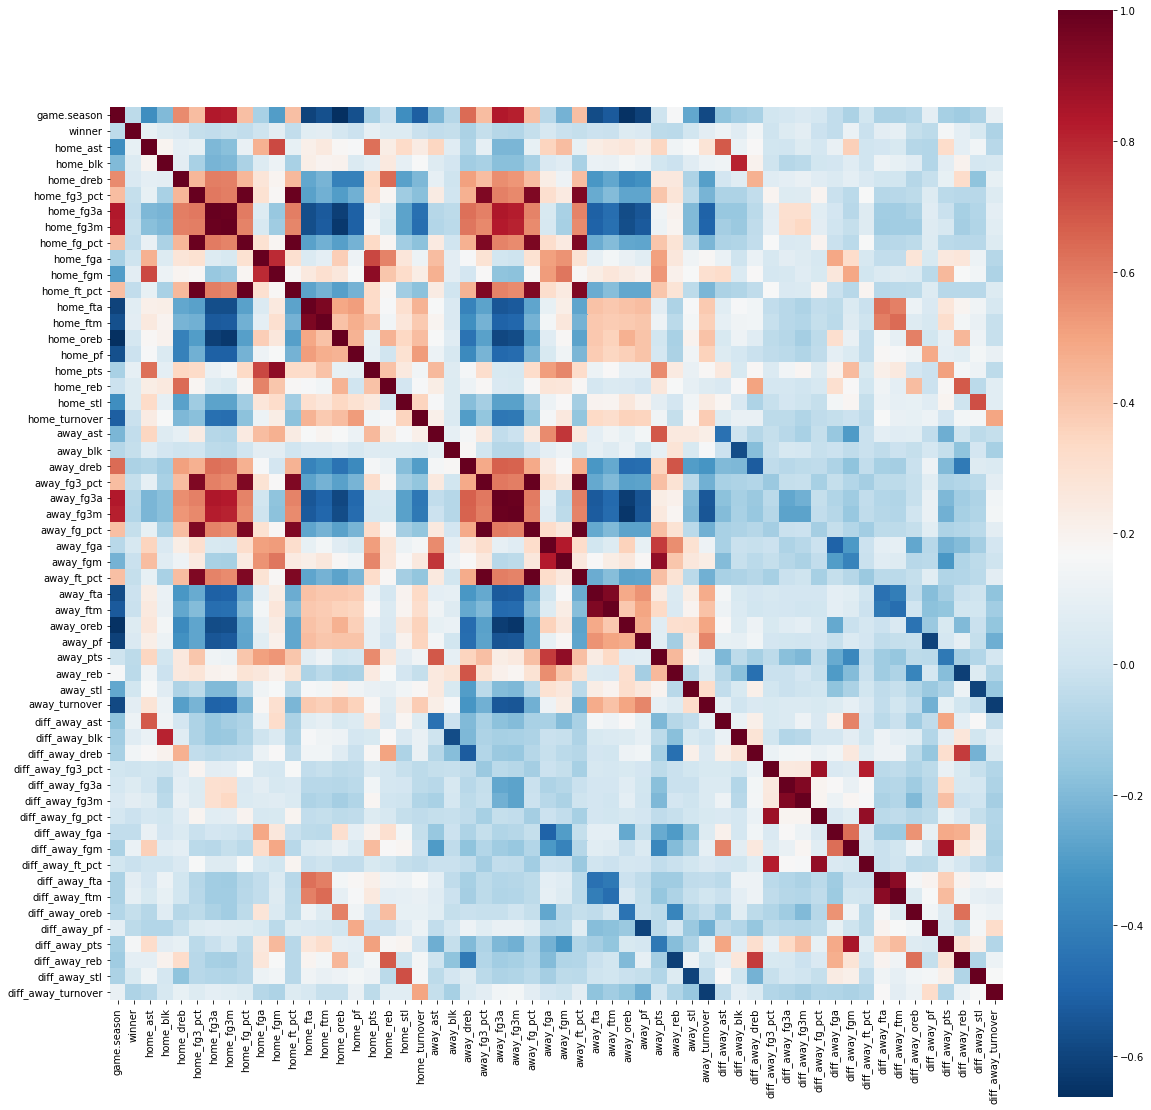

In [11]:
plt.subplots(figsize=(20,20))
sns.heatmap(stats.corr(), square=True, cmap="RdBu_r")
plt.savefig("/content/drive/MyDrive/Machine Learning NBA /NBA-Games-Data-Analysis-and-Match-Prediction/Figures/heatmap.png")
plt.show()

##Check for null values

In [12]:
stats.isna().sum()

game.date             0
game.season           0
winner                0
home_ast              0
home_blk              0
home_dreb             0
home_fg3_pct          0
home_fg3a             0
home_fg3m             0
home_fg_pct           0
home_fga              0
home_fgm              0
home_ft_pct           0
home_fta              0
home_ftm              0
home_oreb             0
home_pf               0
home_pts              0
home_reb              0
home_stl              0
home_turnover         0
away_ast              0
away_blk              0
away_dreb             0
away_fg3_pct          0
away_fg3a             0
away_fg3m             0
away_fg_pct           0
away_fga              0
away_fgm              0
away_ft_pct           0
away_fta              0
away_ftm              0
away_oreb             0
away_pf               0
away_pts              0
away_reb              0
away_stl              0
away_turnover         0
diff_away_ast         0
diff_away_blk         0
diff_away_dreb  

In [ ]:
X = stats.drop(["winner", "game.date", "game.season"], axis=1)
y = stats["winner"]
X.shape

##Dividing the Dataset into 85% training and 15% test set

In [127]:
from sklearn.model_selection import train_test_split
d = {}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 69)

print("Shape of x_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)



Shape of x_train : (37338, 54)
Shape of y_train : (37338,)
Shape of x_test : (9335, 54)
Shape of y_test : (9335,)


##Using All Stats in XGBoost

In [128]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer, LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score
# import packages for hyperparameters tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, KFold

from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')


In [119]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [129]:
%%time

params = {
    'n_estimators': [100, 200, 500,1000, 2000, 5000],
    'learning_rate': [0.001, 0.01,0.05,0.1, 0,2 , 0.8],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1],

  
}
##Tuning Hyperparamtere
gs2 = RandomizedSearchCV(XGBClassifier(objective= 'binary:logistic'), params, n_jobs=-1, cv=KFold(n_splits=5), scoring='average_precision')
gs2.fit(X_train, y_train)

CPU times: user 24.6 s, sys: 1.39 s, total: 26 s
Wall time: 23min 32s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'base_score': [0.2, 0.5, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'gamma': [0, 0.5, 1],
                                        'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1, 0, 2, 0.8],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000, 5000],
                                        'reg_alpha': [0, 0.5, 1],
                                        'reg_lambda': [0.5, 1, 5]},
                   scoring='average_precision')

In [137]:
print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

Best score: 0.733066849948644
Best score: {'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 1, 'booster': 'gbtree', 'base_score': 0.2}


In [131]:
def print_scores(y_pred) :
  	
  print('Precision: %.3f' % precision_score(y_test, y_pred))
  print('Recall: %.3f' % recall_score(y_test, y_pred))
  print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
  print('F1 Score: %.3f' % f1_score(y_test, y_pred))


In [132]:
prediction = gs2.predict(X_test)
prediction

array([1, 1, 0, ..., 1, 1, 0])

In [133]:
print_scores(prediction)

Precision: 0.664
Recall: 0.850
Accuracy: 0.645
F1 Score: 0.746


##Feature Importance

In [134]:
from sklearn.ensemble import  ExtraTreesClassifier

In [135]:
features = X.columns.values.tolist()
features

['home_ast',
 'home_blk',
 'home_dreb',
 'home_fg3_pct',
 'home_fg3a',
 'home_fg3m',
 'home_fg_pct',
 'home_fga',
 'home_fgm',
 'home_ft_pct',
 'home_fta',
 'home_ftm',
 'home_oreb',
 'home_pf',
 'home_pts',
 'home_reb',
 'home_stl',
 'home_turnover',
 'away_ast',
 'away_blk',
 'away_dreb',
 'away_fg3_pct',
 'away_fg3a',
 'away_fg3m',
 'away_fg_pct',
 'away_fga',
 'away_fgm',
 'away_ft_pct',
 'away_fta',
 'away_ftm',
 'away_oreb',
 'away_pf',
 'away_pts',
 'away_reb',
 'away_stl',
 'away_turnover',
 'diff_away_ast',
 'diff_away_blk',
 'diff_away_dreb',
 'diff_away_fg3_pct',
 'diff_away_fg3a',
 'diff_away_fg3m',
 'diff_away_fg_pct',
 'diff_away_fga',
 'diff_away_fgm',
 'diff_away_ft_pct',
 'diff_away_fta',
 'diff_away_ftm',
 'diff_away_oreb',
 'diff_away_pf',
 'diff_away_pts',
 'diff_away_reb',
 'diff_away_stl',
 'diff_away_turnover']

Feature ranking:


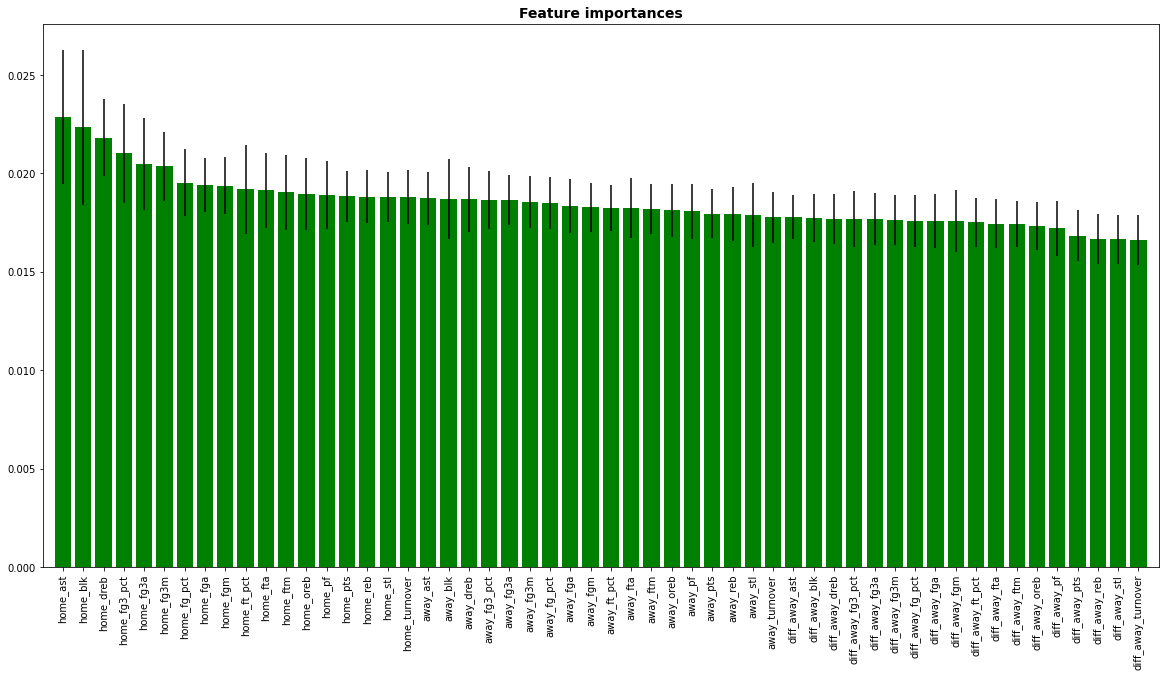

In [136]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1] #reordering features by importance
sorted_importances = [importances[index] for index in indices]
# Print the feature ranking
print("Feature ranking:")


# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances", fontdict={'weight' : 'bold', 'size' : '14'})
plt.bar(range(X_train.shape[1]), importances[indices],
       color="green", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), features)
plt.xticks(rotation=90)
plt.xlim([-1,X_train.shape[1]])

plt.savefig('/content/drive/MyDrive/Machine Learning NBA /NBA-Games-Data-Analysis-and-Match-Prediction/Figures/Feature Importances.png')
plt.show()

              precision    recall  f1-score   support

           0       0.32      0.58      0.41      2030
           1       0.85      0.66      0.75      7305

    accuracy                           0.65      9335
   macro avg       0.59      0.62      0.58      9335
weighted avg       0.74      0.65      0.67      9335



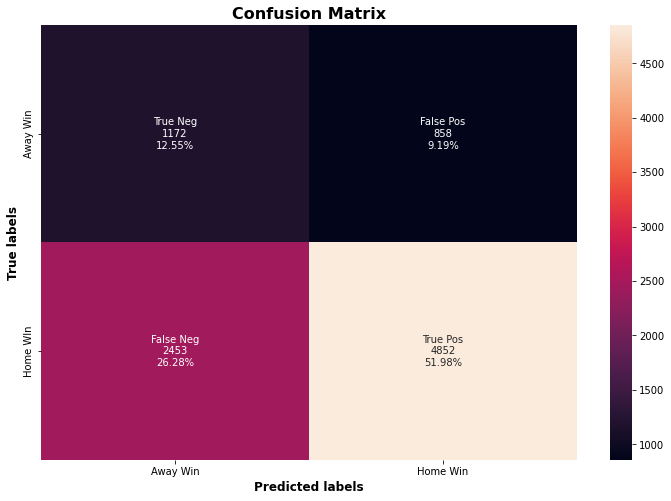

In [149]:
cm = confusion_matrix(prediction, y_test)
ax = plt.figure(figsize=(12,8))
path = '/content/drive/MyDrive/Machine Learning NBA /NBA-Games-Data-Analysis-and-Match-Prediction/Figures/cm.png'
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                    cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm ,annot = labels, fmt = '')
ax.set_title("Confusion Matrix", fontdict = {'weight' : 'bold', 'size' : '16'})
# classification report
ax.set_xlabel('Predicted labels', fontdict = {'weight' : 'bold', 'size' : '12'})
ax.set_ylabel('True labels', fontdict = {'weight' : 'bold', 'size' : '12'}); 
ax.xaxis.set_ticklabels(['Away Win', 'Home Win']); ax.yaxis.set_ticklabels(['Away Win', 'Home WIn']);
ax.figure.savefig(path)
cr = classification_report(prediction, y_test)
print(cr)

In [150]:
import pickle

In [151]:
NBA_results_predictor = gs2.fit(X, y)

pickle.dump(NBA_results_predictor, open("/content/drive/MyDrive/Machine Learning NBA /NBA-Games-Data-Analysis-and-Match-Prediction/Models/model.sav", "wb"))